# The Efficient Frontier - Part I

We are going to compute the efficient frontier when we have a set of expected returns, volatilities (or variances) and correlations (or covariances). It's a fair question as to how we can get these numbers for the future, but for now, we'll assume that historic returns are a reasonable estimate. In future sections, we'll learn how to improve on it.

Let's start by importing a new dataset. This is the Ken French dataset of the returns of 30 different industry portfolios. 

This datafile has a number of minor problems that we'll sort through as we go:


In [1]:
import pandas as pd
ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0)/100
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')

In [2]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [3]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

Note that the column names have embedded spaces. We can strip out the leading and trailing spaces in the Series by using the `.str.strip` method.

In [4]:
ind.columns = ind.columns.str.strip()

In [5]:
ind.shape

(1110, 30)

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import kits.asset_mgmt_kit as amk
ind = amk.get_ind_returns()
ind.shape

(1110, 30)

<AxesSubplot:>

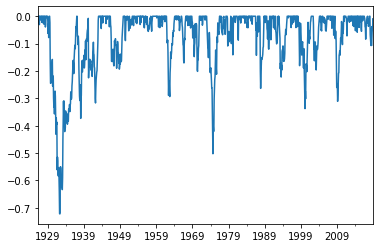

In [7]:
amk.drawdown(ind["Food"])["dd"].plot.line()

In [8]:
amk.var_gaussian(ind[["Food", "Beer", "Smoke"]], level=1, modified=True)

Food     0.172748
Beer     0.348518
Smoke    0.167500
dtype: float64

<AxesSubplot:>

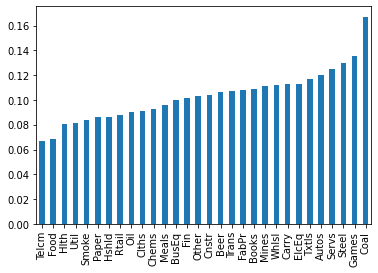

In [9]:
amk.var_gaussian(ind).sort_values().plot.bar()

In [10]:
tmp = (pd.concat({"SR":amk.sharpe_ratio(ind, 0.03, 12), "VaR": amk.var_gaussian(ind, True)}, axis=1)).sort_values(by="SR")

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl

formatted_tmp = tmp.style.background_gradient(cmap="RdYlGn", subset=["SR"])
formatted_tmp.background_gradient(cmap="RdYlGn_r", subset=["VaR"])

formatted_tmp

,SR,VaR
Coal,0.084275,0.240565
Steel,0.126052,0.187121
Whlsl,0.143494,0.161874
Other,0.160862,0.149328
Mines,0.177109,0.160586
Books,0.192686,0.157477
Games,0.194420,0.196048
Txtls,0.194906,0.168994
Trans,0.214624,0.155251
Autos,0.227548,0.174024


<AxesSubplot:title={'center':'Industry Sharpe Ratios 1926-2018'}>

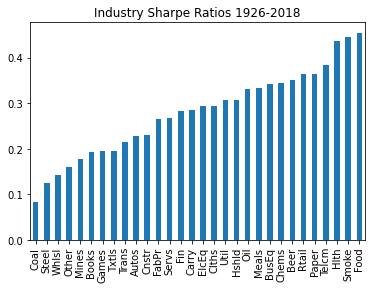

In [12]:
amk.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios 1926-2018")

<AxesSubplot:title={'center':'Industry Sharpe Ratios since 2000'}>

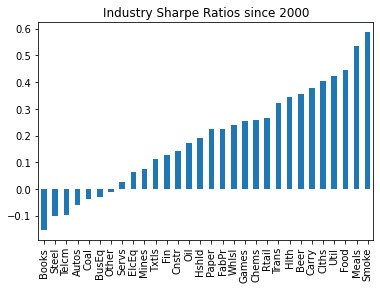

In [13]:
amk.sharpe_ratio(ind["2000":], 0.03, 12).sort_values().plot.bar(title='Industry Sharpe Ratios since 2000')

## Expected Returns and the Covariance Matrix

Generating the efficient frontier requires a set of expected returns and a covariance matrix. For now, let's assume that we can estiamte these simply by looking back in time and naively assuming they will hold in the future. Clearly, they will not, but we will have plenty of time to dig into that in future lectures. For the moment, assume that our naive method of estimating these parameters will suffice.

We can generate an estimate of expected returns using the `annualize_rets()` function, that returns a vector of expected returns. For instance, let's generate the set of expected returns based on historic returns from the 5 year period from 1996 through 2000:

In [14]:
er = amk.annualize_rets(ind["1995":"2000"], 12)

<AxesSubplot:>

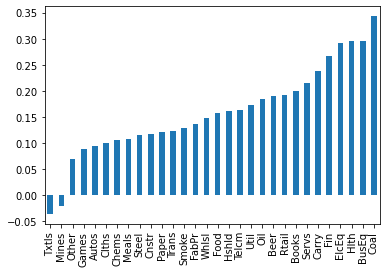

In [15]:
er.sort_values().plot.bar()

Finally, let's generate the covariance matrix. Fortunately, this is easy enough to do using the `.cov` method:

In [16]:
cov = ind["1995":"2000"].cov()
cov.shape

(30, 30)